# Diabetes Prediction - Project 2 
## Kaashi Srinivasulu
## MeriSKILL!

* This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. 
* The objective of the dataset is to diagnostically predict whether a patient has diabetes based on certain diagnostic measurements included in the dataset. 
* Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage 

     The accuracy and f1_score is considered as the evaluation metrics 


In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


* The total number of observations are **768**
* The shape of the data is **768*9**
* There are no null values present in the dataset
***

In [5]:
# more details of data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


* The range of pregnancies is from 0 to 17 with 3.84 as mean value
* The age group of the dataset is from 21 years to 81 years 
* We can observe that columns like Glucose, BloodPressure, Skin,Thickness,Insulin and BMI are having 0 as their minimum value, which is not appropriate
***

In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

* There are no null values but the values are taken as 0 hence let us change the values to NaN

In [7]:
data_copy = data.copy(deep = True)
data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Showing the Count of NANs
print(data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


* Now we can see the null values in the columns like Glucose, BloodPressure, SkinThickness, Insulin and BMI
***

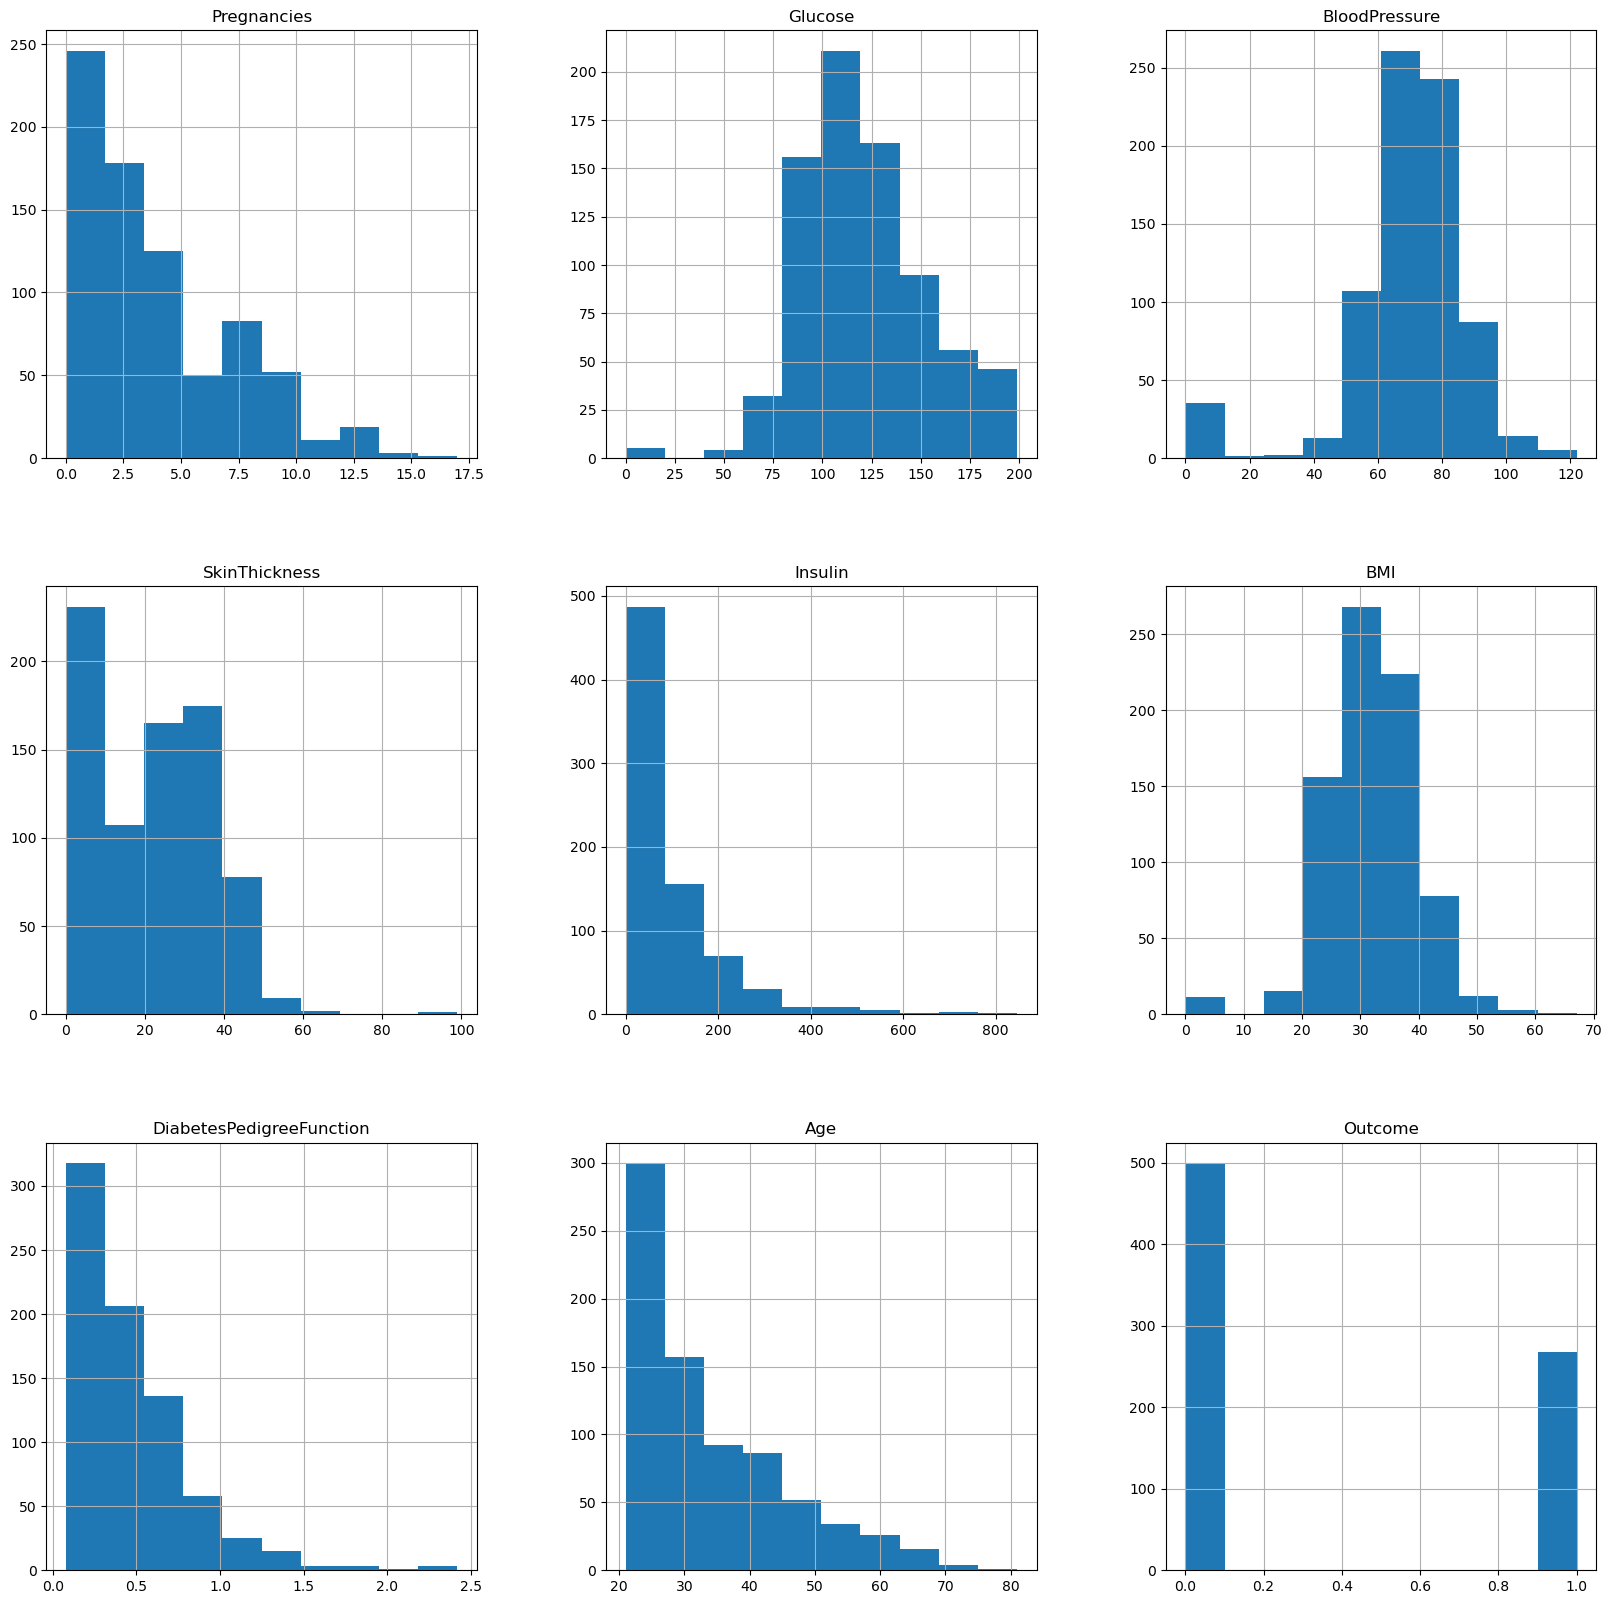

In [8]:
data.hist(figsize=(20,20))
plt.show()

In [9]:
# imputing the null values as follows
data_copy['Glucose'].fillna(data_copy['Glucose'].mean(),inplace=True)
data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].mean(),inplace=True)
data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].median(),inplace=True)
data_copy['Insulin'].fillna(data_copy['Insulin'].median(),inplace=True)
data_copy['BMI'].fillna(data_copy['Insulin'].median(),inplace=True)


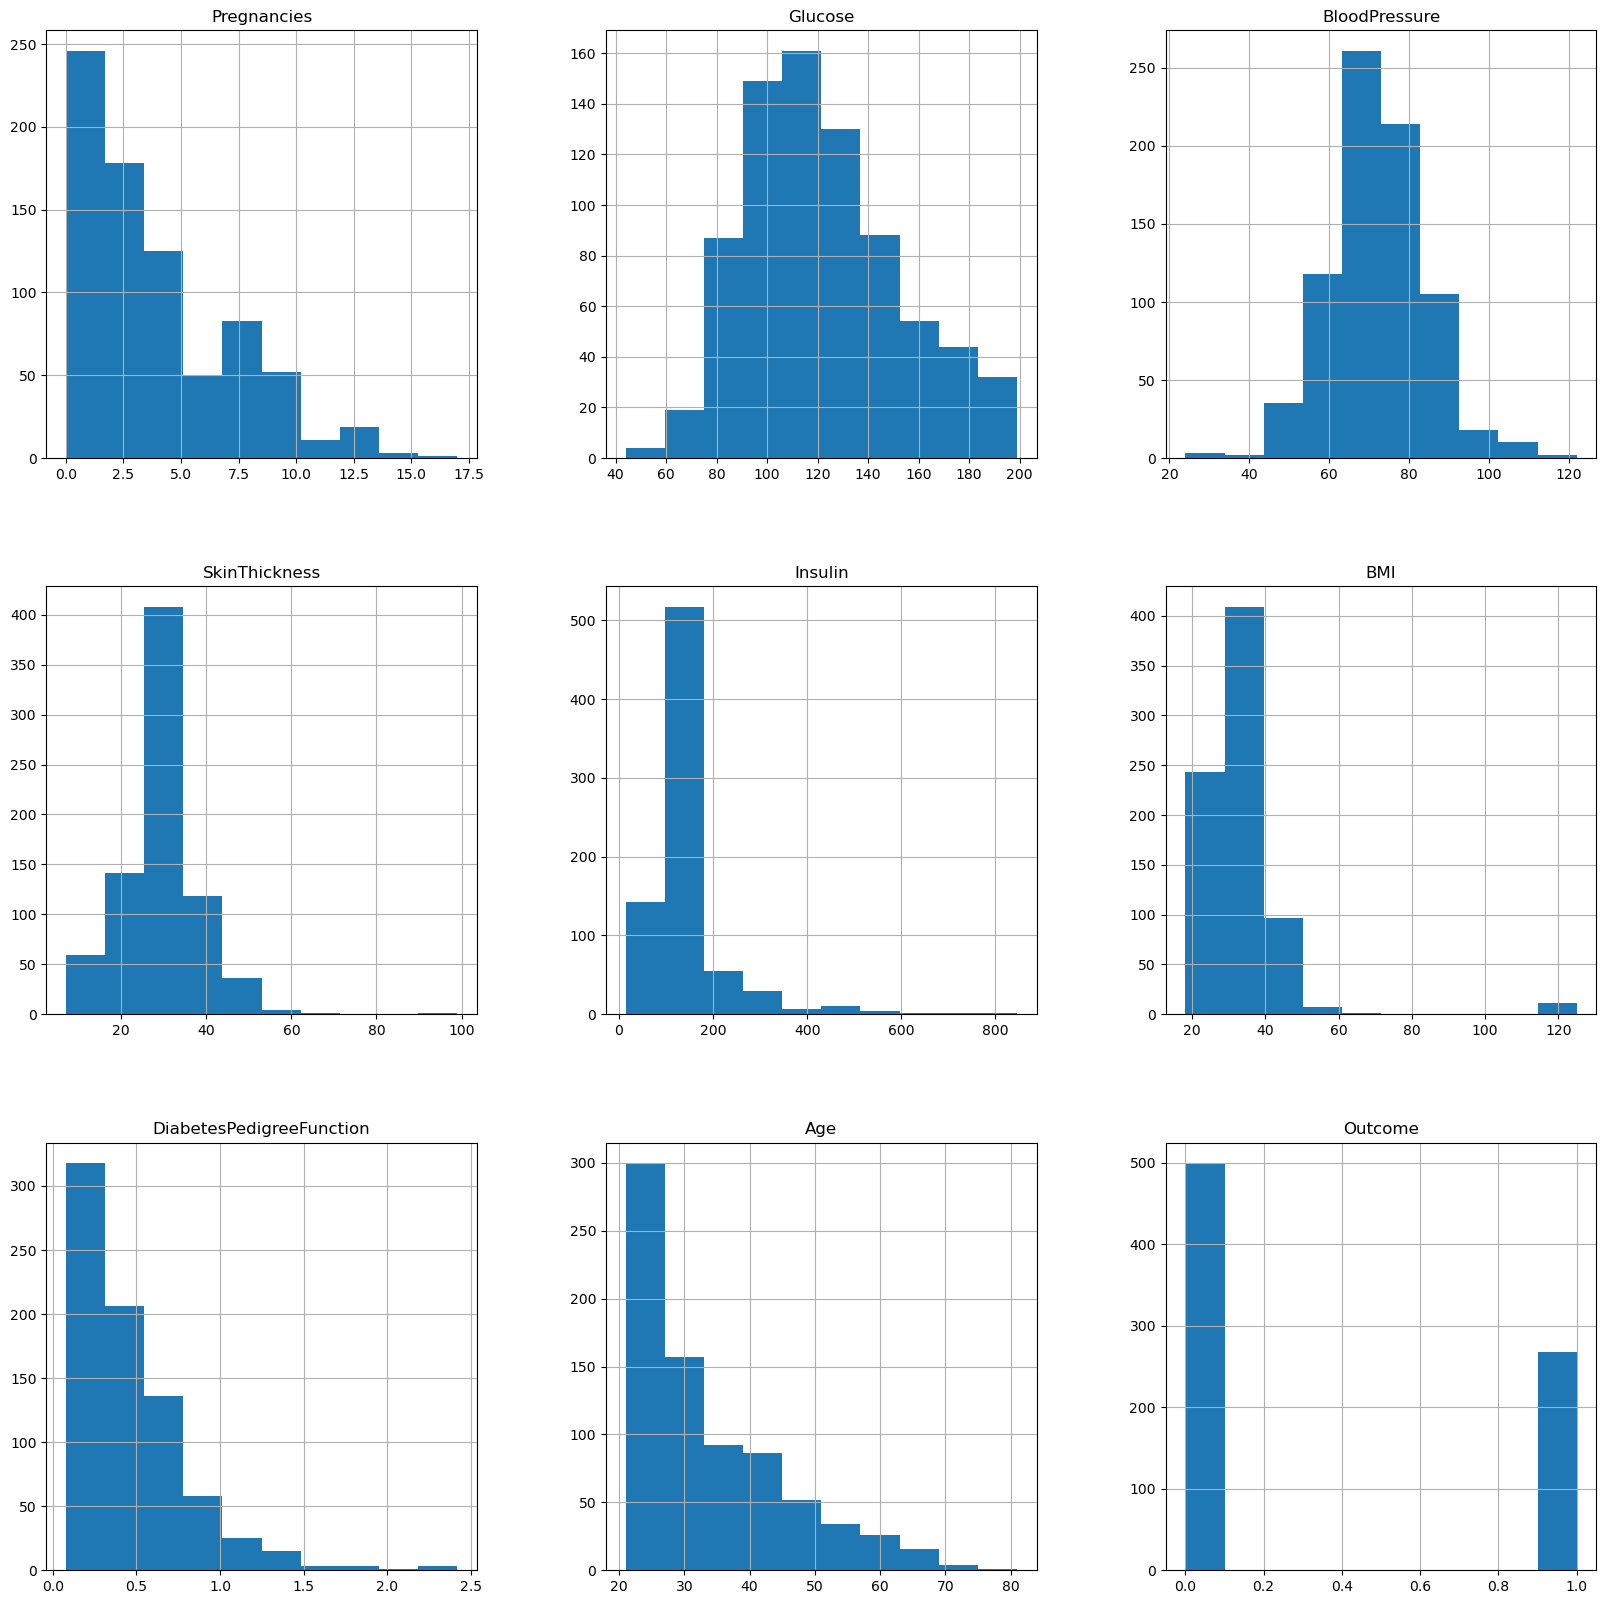

In [10]:
data_copy.hist(figsize=(20,20))
plt.show()

0    500
1    268
Name: Outcome, dtype: int64

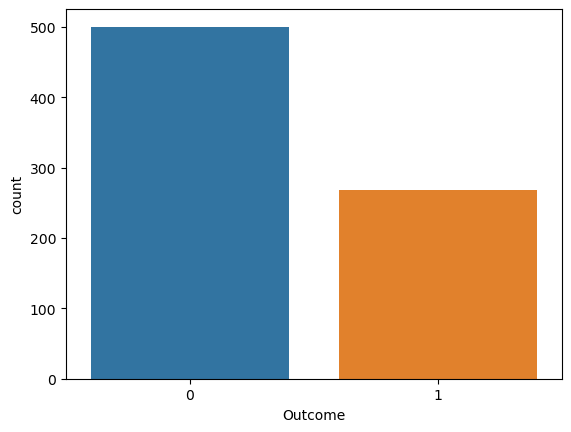

In [11]:
sns.countplot(x=data_copy['Outcome'])
data_copy['Outcome'].value_counts()

* From above visulaization the Outcome is imbalaced, the patients who are diabetic are only half of non-diabetic patients
***

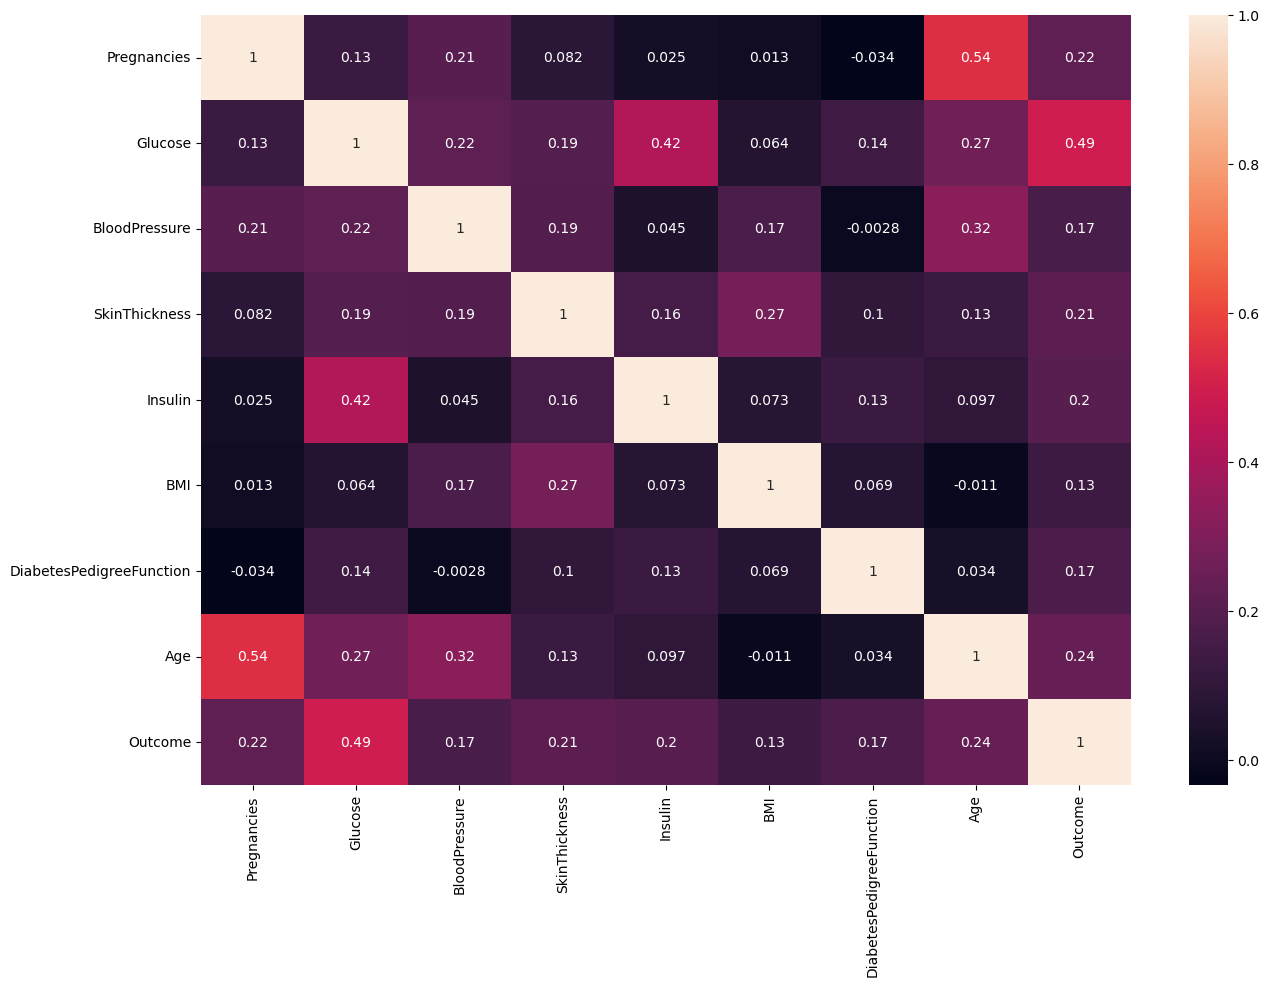

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(data_copy.corr(),annot=True)
plt.show()

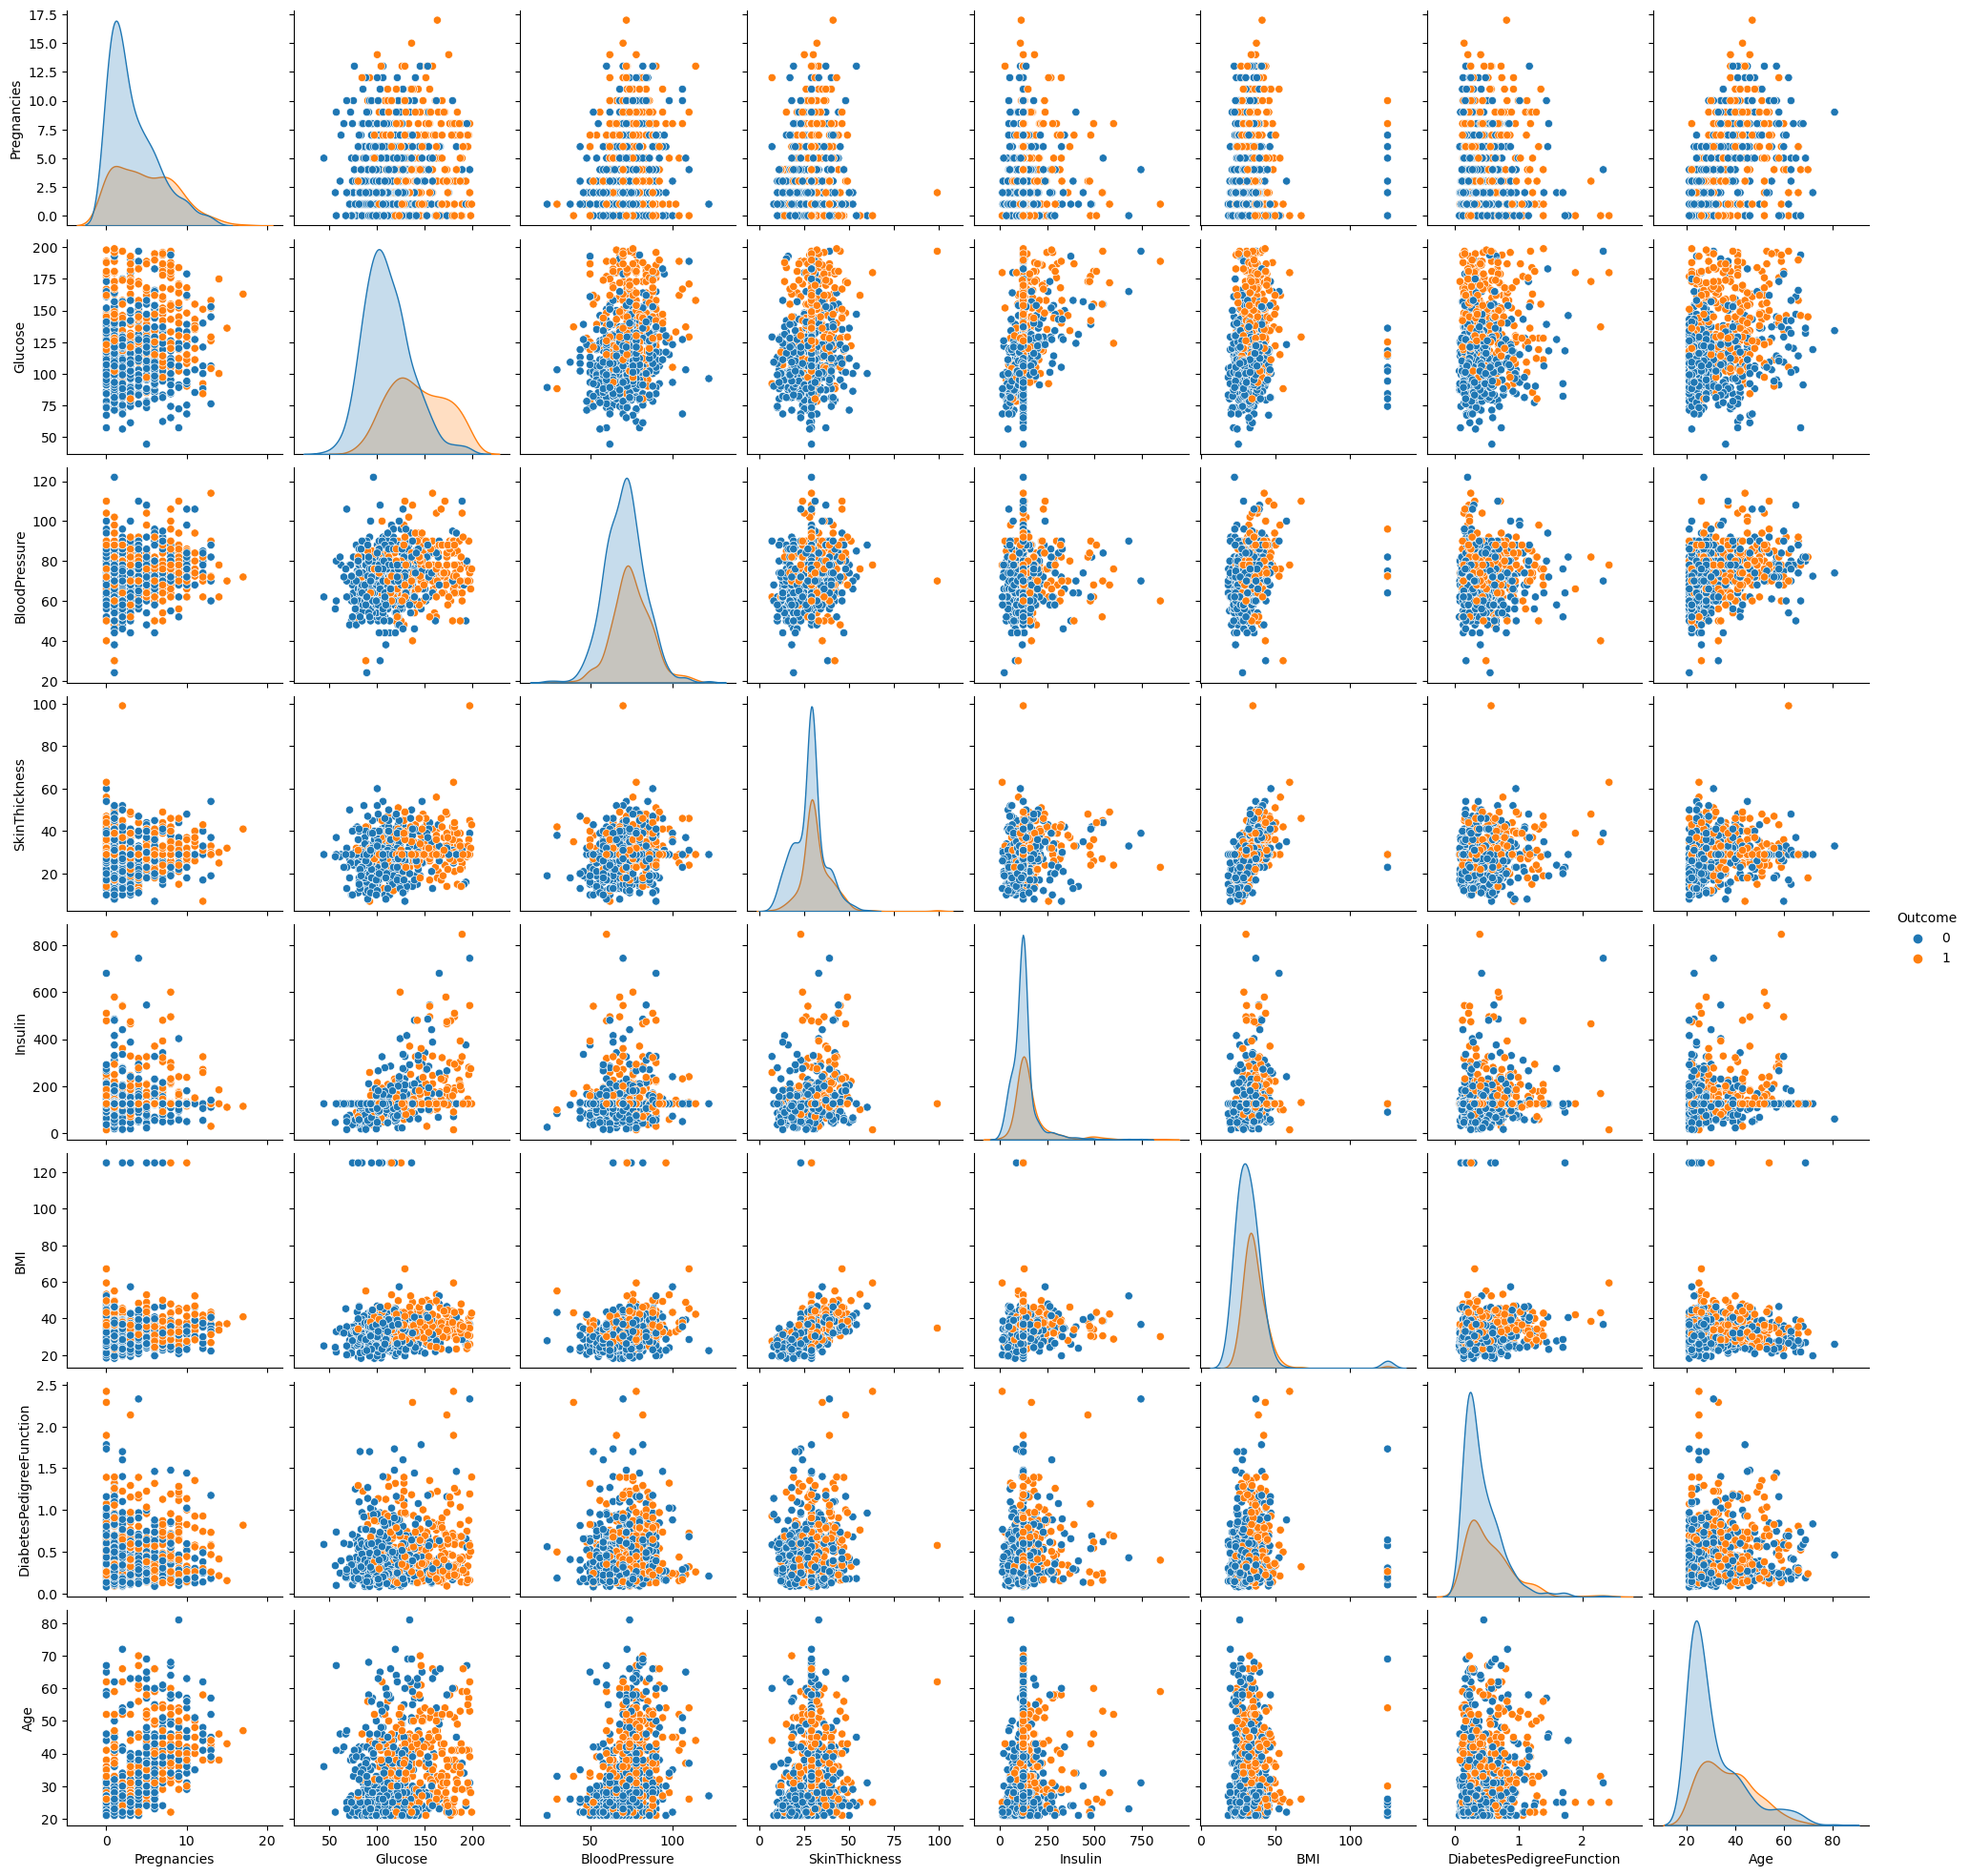

In [13]:
sns.pairplot(data_copy,hue='Outcome')
plt.show()

### Model Building

In [14]:
# splitting the data into features and target variables
X = data_copy.drop('Outcome',axis=1)
y = data_copy['Outcome']

In [15]:
# splitting the data into test and train columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [16]:
# scaling the data using Standard scalar
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [17]:
# shape of x train and X test datasets
X_train_scaled.shape,X_test_scaled.shape

((537, 8), (231, 8))

In [18]:
# creating an instance of Logistic regression
logistic_model = LogisticRegression(random_state=101)
logistic_model.fit(X_train_scaled,y_train)

LogisticRegression(random_state=101)

In [19]:
# predicting on the test data by logistic regression
test_predict_log=logistic_model.predict(X_test_scaled)
print('The accuracy score on test data is',accuracy_score(y_test,test_predict_log))

The accuracy score on test data is 0.7662337662337663


In [20]:
print('The f1 score on test data is',f1_score(y_test,test_predict_log))

The f1 score on test data is 0.6301369863013698


In [21]:
# imporitng libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Decision Tree Classifier

In [22]:
# decision tree classifier model for prediction
decision_tree = DecisionTreeClassifier(random_state=101)
decision_tree.fit(X_train_scaled,y_train)
test_predict_decision = decision_tree.predict(X_test_scaled)

In [23]:
print('The accuracy score for decision tree classifier is',accuracy_score(y_test,test_predict_decision))
print('The f1_score for decision tree classifier is',f1_score(y_test,test_predict_decision))

The accuracy score for decision tree classifier is 0.7316017316017316
The f1_score for decision tree classifier is 0.6265060240963856


### Gradient Boost Classifier

In [24]:
# gradient boost classifier model for prediction
gradient_boost =GradientBoostingClassifier(random_state=101)
gradient_boost.fit(X_train_scaled,y_train)
test_predict_gradient = gradient_boost.predict(X_test_scaled)

In [25]:
print('The accuracy score for gradient boost classifier is',accuracy_score(y_test,test_predict_gradient))
print('The f1_score for gradient boost classifier is',f1_score(y_test,test_predict_gradient))

The accuracy score for gradient boost classifier is 0.7489177489177489
The f1_score for gradient boost classifier is 0.6506024096385542


### Random Forest Classifier

In [26]:
# random forest classifier model for prediction
random_forest = RandomForestClassifier(random_state=101)
random_forest.fit(X_train_scaled,y_train)
test_predict_rf = random_forest.predict(X_test_scaled)

In [27]:
print('The accuracy score for gradient boost classifier is',accuracy_score(y_test,test_predict_rf))
print('The f1_score for gradient boost classifier is',f1_score(y_test,test_predict_rf))

The accuracy score for gradient boost classifier is 0.7575757575757576
The f1_score for gradient boost classifier is 0.6455696202531646


* The accuracy score of 
      Logistic Regression is 0.766
      Decision Tree classifier is 0.731
      Gradient Boost Classifier is 0.748
      Random Forest Classifier is 0.7575

* The F1_score of 
      Logistic Regression is 0.630
      Decision Tree classifier is 0.626
      Gradient Boost Classifier is 0.650
      Random Forest Classifier is 0.645

 * The accuracy score is best for **logistic model** and f1 score is best for **gradient boost classifier model**

### Grid Search

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
def grid_search(classifier, param_grid, X, y, scoring = 'f1_weighted'):
    
    # split the data in training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
    
    # Scaling the train data by Standard scalar
    scalar = StandardScaler()
    X_train_scaled = scalar.fit_transform(X_train)
    X_test_scaled = scalar.transform(X_test)
    
    # Perform Grid Search
    grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring=scoring, n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    
    # Print the Best Parameters
    print("Best Parameters:", grid_search.best_params_)







def model_evaluation(ml_model,X,y):
    
     # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
    
    # Scaling the train data by Standard scalar
    scalar = StandardScaler()
    X_train_scaled = scalar.fit_transform(X_train)
    X_test_scaled = scalar.transform(X_test)
    
    # creating a model instance
    model = ml_model
    model.fit(X_train_scaled,y_train)
    
    # Make Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Evaluate the Model
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_f1_score = f1_score(y_train, y_train_pred, average='weighted')
    test_f1_score = f1_score(y_test, y_test_pred, average='weighted')

    print("Training Accuracy:", train_accuracy)
    print("Testing Accuracy:", test_accuracy)
    print('-'*50)
    print("Training F1 Score (weighted):", train_f1_score)
    print("Testing F1 Score (weighted):", test_f1_score)
    
    return train_accuracy,test_accuracy,train_f1_score,test_f1_score

#### Decision Tree 

In [30]:
X = data_copy.drop('Outcome',axis=1)
y = data_copy['Outcome']

# Define the Decision Tree Classifier and hyperparameter grid for grid search
decision_tree = DecisionTreeClassifier(random_state=101)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 8, 10]
}
grid_search(classifier=decision_tree,param_grid=param_grid,scoring='f1_weighted',X=X,y=y)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 2}


In [31]:
dt_score = model_evaluation(DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_leaf=8,min_samples_split=2),X,y)

Training Accuracy: 0.8229166666666666
Testing Accuracy: 0.7447916666666666
--------------------------------------------------
Training F1 Score (weighted): 0.8252848487977833
Testing F1 Score (weighted): 0.7492527167476717


#### Random Forest

In [32]:
X = data_copy.drop('Outcome',axis=1)
y = data_copy['Outcome']

# Define the Random Forest Classifier and hyperparameter grid for grid search
rf_classifier = RandomForestClassifier(random_state=101)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'max_features': ['auto', 'sqrt']
}

# grid_search function
best_random_search = grid_search(rf_classifier, param_grid, X, y)

Best Parameters: {'max_depth': 10, 'max_features': 'auto', 'n_estimators': 100}


In [33]:
rf_score = model_evaluation(RandomForestClassifier(max_depth=10,max_features='auto',n_estimators=100),X,y)

Training Accuracy: 0.9878472222222222
Testing Accuracy: 0.765625
--------------------------------------------------
Training F1 Score (weighted): 0.9878254495174441
Testing F1 Score (weighted): 0.7634681531545123


#### Gradient Boost

In [34]:
X = data_copy.drop('Outcome',axis=1)
y = data_copy['Outcome']

# Define the Gradient boosting Classifier and hyperparameter grid for grid search
gbm_classifier = GradientBoostingClassifier(random_state=101)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'max_features': ['auto','sqrt']
}

# grid_search function
best_gradient_boost = grid_search(gbm_classifier, param_grid, X, y)

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 100}


In [35]:
gb_score = model_evaluation(GradientBoostingClassifier(n_estimators=100,max_depth=20,max_features='sqrt'),X,y)

Training Accuracy: 1.0
Testing Accuracy: 0.7395833333333334
--------------------------------------------------
Training F1 Score (weighted): 1.0
Testing F1 Score (weighted): 0.7395833333333334


In [36]:
scores_data = pd.DataFrame({'dt score':dt_score,'rf score':rf_score,'gb score': gb_score},
                           index=['train accuracy','test accuracy','train f1','test f1'])
scores_data

,dt score,rf score,gb score
train accuracy,0.822917,0.987847,1.000000
test accuracy,0.744792,0.765625,0.739583
train f1,0.825285,0.987825,1.000000
test f1,0.749253,0.763468,0.739583


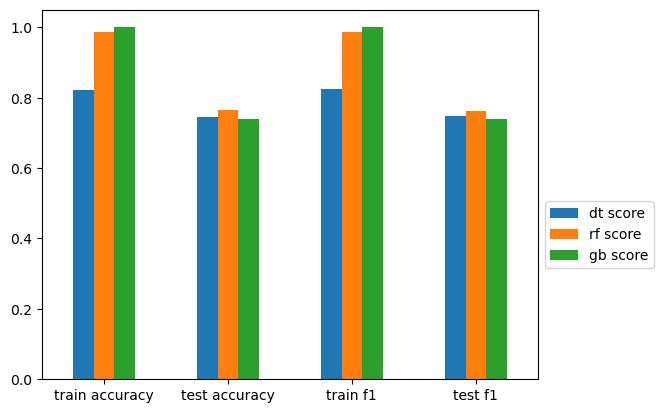

In [37]:
score_plot=scores_data.plot(y=['dt score','rf score','gb score'],kind='bar',rot=0)
score_plot.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))
plt.show()

* From above graph the Gradient boost model is best performer on the training data and Random Forest is best performer on testing data

In [38]:
decision_tree = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_leaf=8,min_samples_split=2)
decision_tree.fit(X_train_scaled,y_train)
decision_tree.feature_importances_

array([0.00281798, 0.51609451, 0.03144362, 0.0343589 , 0.03943707,
       0.11887285, 0.06917896, 0.18779611])

In [39]:
gradient_boost = GradientBoostingClassifier(n_estimators= 100, max_depth= 20, max_features= 'sqrt')
gradient_boost.fit(X_train_scaled,y_train)
gradient_boost.feature_importances_

array([0.07670188, 0.24598665, 0.08622578, 0.08799447, 0.09185457,
       0.15884433, 0.11162447, 0.14076784])

In [40]:
random_forest =RandomForestClassifier(n_estimators = 100, max_depth = 10,max_features= 'auto')
random_forest.fit(X_train_scaled,y_train)
random_forest.feature_importances_

array([0.07755259, 0.26504731, 0.07670062, 0.08288426, 0.09660141,
       0.15315546, 0.11825831, 0.12980004])

In [41]:
importance_df = pd.DataFrame({"Feature": X.columns, 
                              "Decision Tree": decision_tree.feature_importances_,
                              "Random Forest": random_forest.feature_importances_,
                              "Gradient Boost": gradient_boost.feature_importances_
                              })
importance_df

,Feature,Decision Tree,Random Forest,Gradient Boost
0,Pregnancies,0.002818,0.077553,0.076702
1,Glucose,0.516095,0.265047,0.245987
2,BloodPressure,0.031444,0.076701,0.086226
3,SkinThickness,0.034359,0.082884,0.087994
4,Insulin,0.039437,0.096601,0.091855
5,BMI,0.118873,0.153155,0.158844
6,DiabetesPedigreeFunction,0.069179,0.118258,0.111624
7,Age,0.187796,0.129800,0.140768


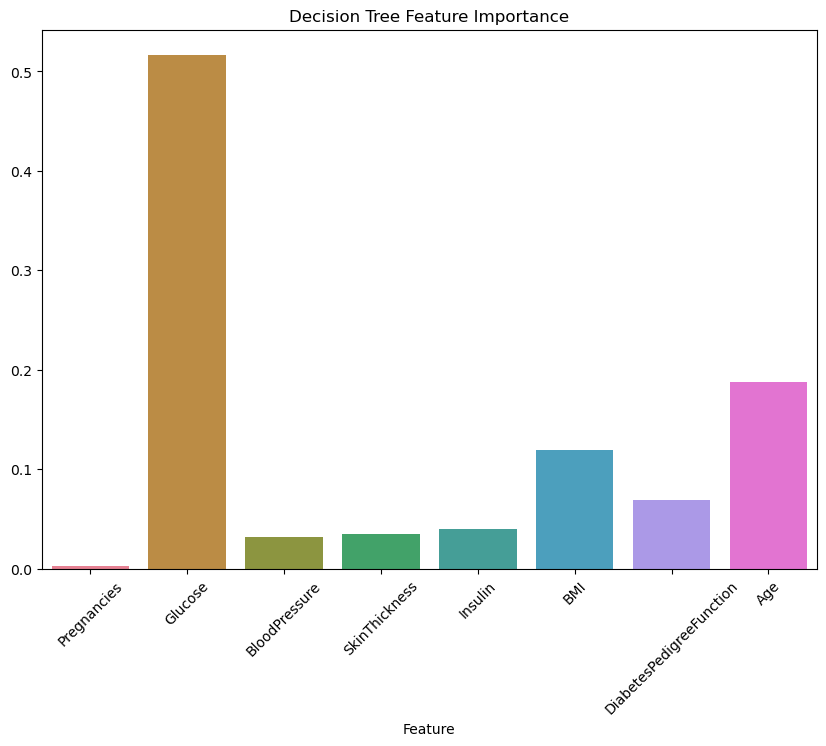

In [42]:
# Important features by Decision tree classifier
plt.figure(figsize=(10,7))
sns.barplot(x=importance_df['Feature'], y=importance_df['Decision Tree'], palette='husl')
plt.xticks(rotation=45)
plt.ylabel(None)
plt.title('Decision Tree Feature Importance')
plt.show()

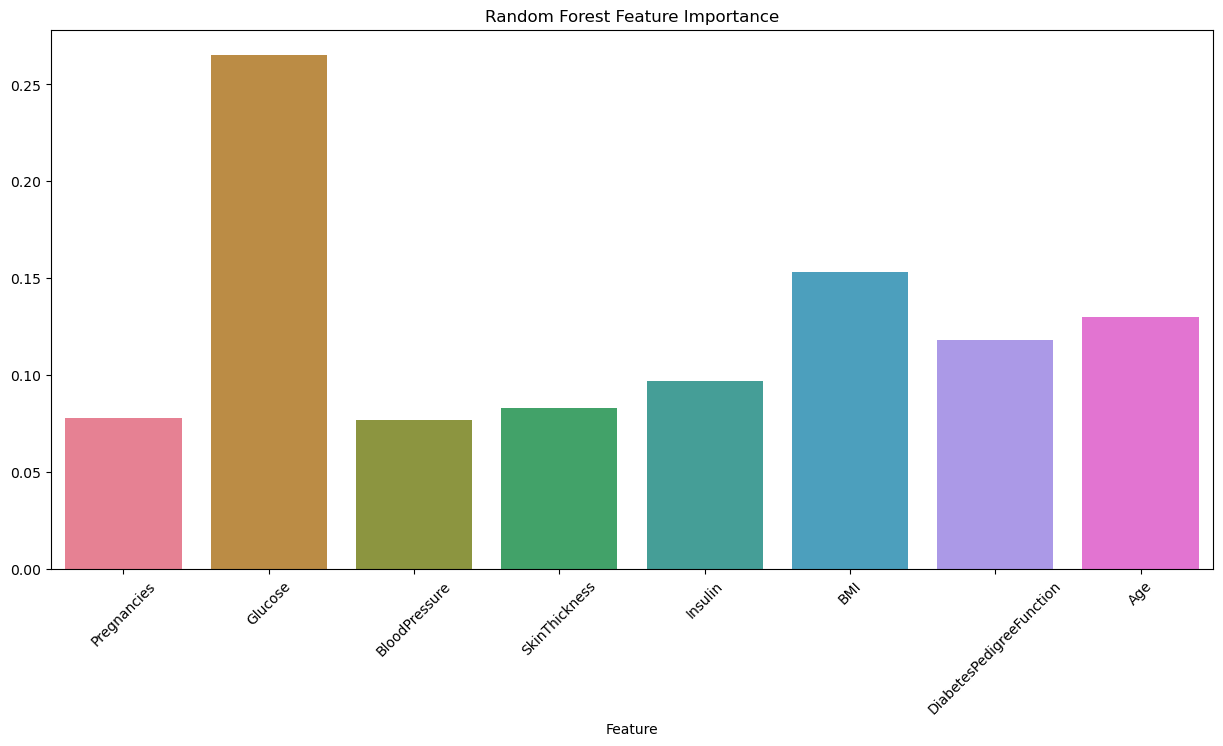

In [43]:
# Important features by Random forest classifier
plt.figure(figsize=(15,7))
sns.barplot(x=importance_df['Feature'], y=importance_df['Random Forest'], palette='husl')
plt.xticks(rotation=45)
plt.ylabel(None)
plt.title('Random Forest Feature Importance')
plt.show()

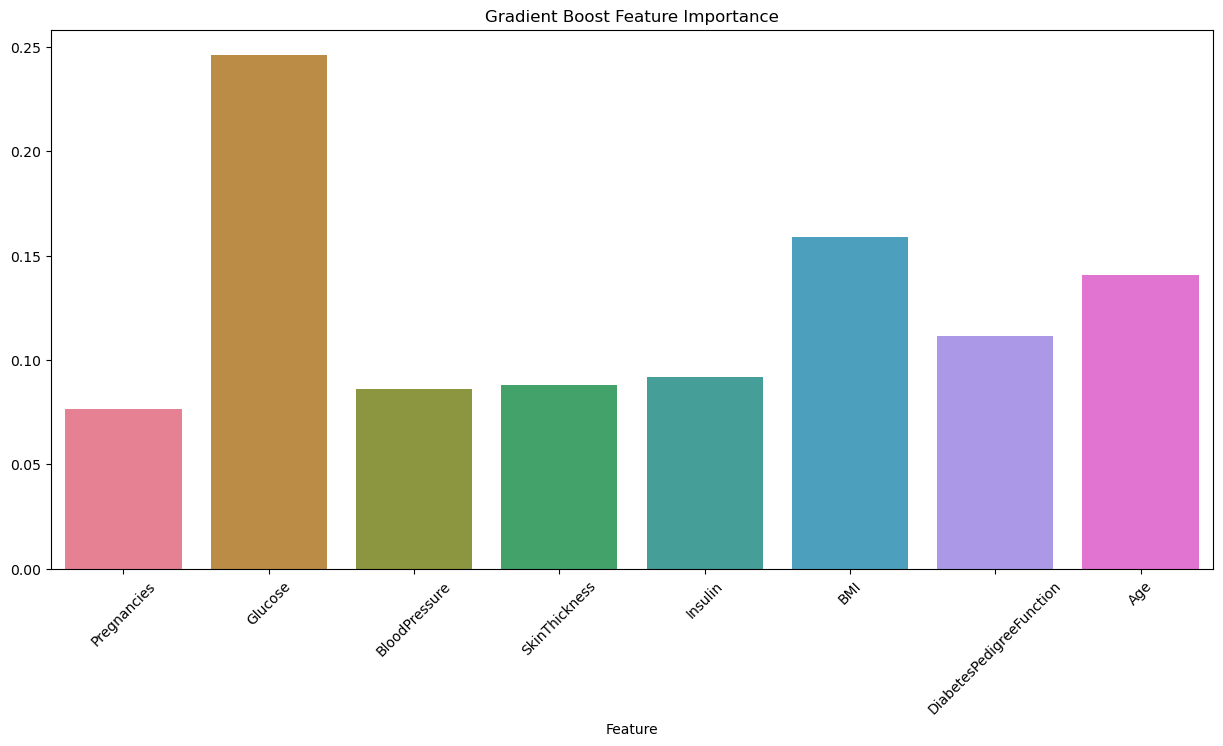

In [44]:
# Important features by Gradient boost classifier
plt.figure(figsize=(15,7))
sns.barplot(x=importance_df['Feature'], y=importance_df['Gradient Boost'], palette='husl')
plt.xticks(rotation=45)
plt.ylabel(None)
plt.title('Gradient Boost Feature Importance')
plt.show()

* From above graphs it is clear that, in decision tree the more importance is given to Glucose itself resulting in less f1_score
* In the Random forest the importance is distributed according to features weights 
* In Gradient boost the importance is of features is increased by decreasing the Glucose which resulting in less f1 score